In [87]:
import mlrose
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from textwrap import wrap

In [88]:
df = pd.read_csv('audit_dataset.csv', header = None)

df = pd.get_dummies(df)

df = df.astype(float)

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [113]:
scaler = MinMaxScaler()

X_train_scaled = X_train
X_test_scaled = X_test

In [114]:
one_hot = OneHotEncoder(categories='auto')

y_train_hot = one_hot.fit_transform(y_train.values.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.values.reshape(-1, 1)).todense()

# Testing Number of Max Iterations 

In [115]:
np.random.seed(4)
# learning_rates = [.01, .02, .03, .04, .05, .06, .07, .08, .09, .1]
structure = [[10, 15, 10], [10, 10, 10]]
maxiter = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]#, 1100, 1200, 1300, 1400, 1500]
testError = []
trainError = []
print("start")
for mi in maxiter :
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10, 15, 10], activation ='tanh', 
                                 algorithm ='gradient_descent', 
                                 max_iters = mi, bias = True, is_classifier = True, 
                                 learning_rate = .0001, early_stopping = True)
    nn_model1.fit(X_train_scaled, y_train_hot)
    y_train_pred = nn_model1.predict(X_train_scaled)
    train_error = 1 - accuracy_score(y_train_hot, y_train_pred)
    trainError.append(train_error)
    y_test_pred = nn_model1.predict(X_test_scaled)
    test_error = 1 - accuracy_score(y_test_hot, y_test_pred)
    testError.append(test_error)
    print(mi, test_error)


start
100 0.18534482758620685
200 0.09482758620689657
300 0.0818965517241379
400 0.05603448275862066
500 0.09051724137931039
600 0.07758620689655171
700 0.07327586206896552
800 0.06034482758620685
900 0.10344827586206895
1000 0.0818965517241379


[0.18534482758620685, 0.09482758620689657, 0.0818965517241379, 0.05603448275862066, 0.09051724137931039, 0.07758620689655171, 0.07327586206896552, 0.06034482758620685, 0.10344827586206895, 0.0818965517241379]


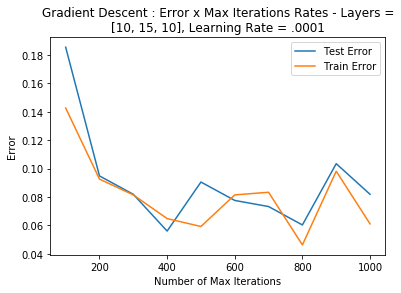

In [116]:
print(testError)
plt.figure()
title = "Gradient Descent : Error x Max Iterations Rates - Layers = [10, 15, 10], Learning Rate = .0001"
plt.title('\n'.join(wrap(title,60)))
# plt.subplots_adjust(top=0.85)
plt.plot(maxiter, testError, '-', label='Test Error')
plt.plot(maxiter, trainError, '-', label='Train Error')
plt.legend()
plt.xlabel('Number of Max Iterations')
plt.ylabel('Error')
filename = 'MaxIterations9.png'
plt.savefig("BaseLinePics/" + filename)